In [9]:
pip install pandas numpy matplotlib seaborn scikit-learn pandas-profiling openai streamlit openpyxl 


^C
Note: you may need to restart the kernel to use updated packages.


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached openai-1.59.7-py3-none-any.whl.metadata (27 kB)
  Using cached streamlit-1.41.1-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp311-cp311-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp311-cp311-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0

In [5]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd

# Load dataset
data = pd.read_excel(r"C:\Users\Appala nithin\Downloads\FINANCIAL RISK PROJECT\default of credit card clients.xls")

# Display initial rows
print("First 5 rows of the dataset:")
print(data.head())

# Check dataset summary
print("\nDataset Information:")
print(data.info())


First 5 rows of the dataset:
  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21    

In [12]:
# Handle missing values for numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Remove duplicate rows
data.drop_duplicates(inplace=True)

# Identify outliers in 'BILL_AMT1' using z-score
from scipy.stats import zscore

if 'BILL_AMT1' in data.columns:  # Replace 'BILL_AMT1' with your numeric column of interest
    data['z_score'] = zscore(data['BILL_AMT1'])
    data = data[data['z_score'].abs() < 3]
    data.drop(columns='z_score', inplace=True)

print("Data Cleaning Complete!")


Data Cleaning Complete!


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_excel("C:/Users/Appala nithin/Downloads/FINANCIAL RISK PROJECT/default of credit card clients.xls")

# Display the first few rows and columns to inspect the data
print("First 5 rows of the dataset:")
print(data.head())

# Remove the first column (Unnamed: 0) which is the index column
data = data.drop(columns=["Unnamed: 0"])

# Separate features (X) and target variable (y)
X = data.drop(columns=["Y"])  # 'Y' is the target column
y = data["Y"]  # Target column (risk level)

# Check unique values in the target column (y)
print(f"Unique values in the target column 'Y': {y.unique()}")

# Ensure the target variable is categorical
# If it's not, we can convert it into categories (e.g., binning or thresholding)
y = y.astype(str)  # Converting to string if it's not already, to ensure it's categorical

# **PART 1: LABEL ENCODING (for ordinal categorical columns)**

# Apply Label Encoding to columns with non-numeric data (example, assuming 'education', 'marriage', etc.)
label_encoder = LabelEncoder()

# Iterate over columns and apply label encoding to non-numeric ones
for col in X.select_dtypes(include=['object']).columns:
    # Ensure the column contains uniform data types (convert to string if necessary)
    X[col] = X[col].astype(str)  # Ensure the data is uniform (string)
    
    # Apply Label Encoding
    X[col] = label_encoder.fit_transform(X[col])

# **PART 2: ONE-HOT ENCODING (for nominal categorical columns)**
# If you have nominal categorical columns, use One-Hot Encoding (for example, for 'sex', 'education' etc.)
# This step is useful if you have categorical columns where values do not have an inherent order.
X = pd.get_dummies(X, drop_first=True)

# **PART 3: HANDLE MISSING VALUES**

# Handle missing values by replacing them with the column mean for numeric columns
X.fillna(X.mean(), inplace=True)

# **PART 4: SPLIT THE DATASET INTO TRAINING AND TESTING SETS**

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **PART 5: TRAIN THE RANDOM FOREST MODEL**

# Initialize and train a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# **PART 6: PREDICTIONS AND MODEL EVALUATION**

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, predictions)

# Print the accuracy
print(f"Model Accuracy: {accuracy * 100:.2f}%")


First 5 rows of the dataset:
  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3   
1     -1  ...          0          0          0         0       689         0   
2      0  ...       3272       3455       3261         0      1000      1000   
3      0  ...      14331      14948      15549      1518      1500      1000   
4      0  ...      28314      28959      29547      2000      2019      1200   

        X21    

In [15]:
print(data.columns)


Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')


In [17]:
# Check data types of the features
print(X.dtypes)


X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X7     object
X8     object
X9     object
X10    object
dtype: object


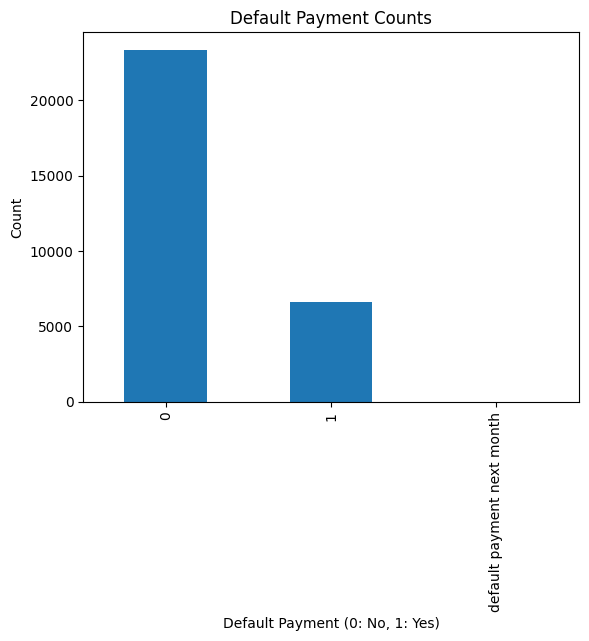

In [24]:
import matplotlib.pyplot as plt

# Visualizing the default payment counts based on 'Y'
data['y'].value_counts().plot(kind='bar', title='Default Payment Counts')
plt.xlabel('Default Payment (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


In [29]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.8/390.2 MB 2.8 MB/s eta 0:02:19
   ---------------------------------------- 1.6/390.2 MB 3.2 MB/s eta 0:02:01
   ---------------------------------------- 2.1/390.2 MB 3.2 MB/s eta 0:02:03
   ---------------------------------------- 2.9/390.2 MB 3.1 MB/s eta 0:02:07
   ---------------------------------------- 3.4/390.2 MB 3.1 MB/s eta 0:02:07
   ---------------------------------------- 4.2/390.2 MB 3.1 MB/s eta 0:02:05
    --------------------------------------- 5.0/390.2 MB 3.2 MB/s eta 0:02:00
    --------------------------------------- 5.8/390.2 MB 3.2 MB/s eta 0:02:02
    ---------

  You can safely remove it manually.
  You can safely remove it manually.


In [41]:
pip install torch==2.1.0+cu12.6 torchvision==0.15.0+cu12.6 torchaudio==2.1.0+cu12.6


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch==2.1.0+cu12.6 (from versions: 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1)
ERROR: No matching distribution found for torch==2.1.0+cu12.6


In [38]:
pip uninstall torch


^C
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install --upgrade transformers


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install transformers


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.7 MB 762.0 kB/s eta 0:00:13
   -- ------------------------------------- 0.5/9.7 MB 762.0 kB/s eta 0:00:13
   --- ------------------------------------ 0.8/9.7 MB 859.5 kB/s eta 0:00:11
   ----- ---------------------------------- 1.3/9.7 MB 1.0 MB/s eta 0:00:08
   ------ --------------------------------- 1.6/9.7 MB 1.1 MB/s eta 0:00:08
   ------- -------------------------------- 1.8/9.7 MB 1.1 MB/s eta 0:00:08
   -------- ------------------------------- 2.1/9.7 MB 1.1 MB/s eta 0:00:07
   --------- ------------------------------ 2.4/9.7 MB 1.1 MB/s eta 0:00:07
   ---------- ----------------------------- 2.6/9.7 MB 1.1 MB/s eta 0:00:07
   ----------- ----------

In [30]:
import torch
print(torch.__version__)  # For PyTorch

import tensorflow as tf
print(tf.__version__)  # For TensorFlow


2.5.1+cpu
2.18.0


In [36]:
from transformers import pipeline

# Load the summarization pipeline from Hugging Face
summarizer = pipeline("summarization", framework="pt", device=0)

  # Use "tf" if using TensorFlow


# Example data description summary (replace with your data)
data_description = data.describe().to_string()

# Create a summary
summary = summarizer(data_description, max_length=150, min_length=30, do_sample=False)

print("Generated Insights:")
print(summary[0]['summary_text'])


No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [37]:
import torch
print(torch.cuda.is_available())  # Should print True if CUDA is available
print(torch.cuda.get_device_name(torch.cuda.current_device()))  # Should show your GPU name


False


AssertionError: Torch not compiled with CUDA enabled